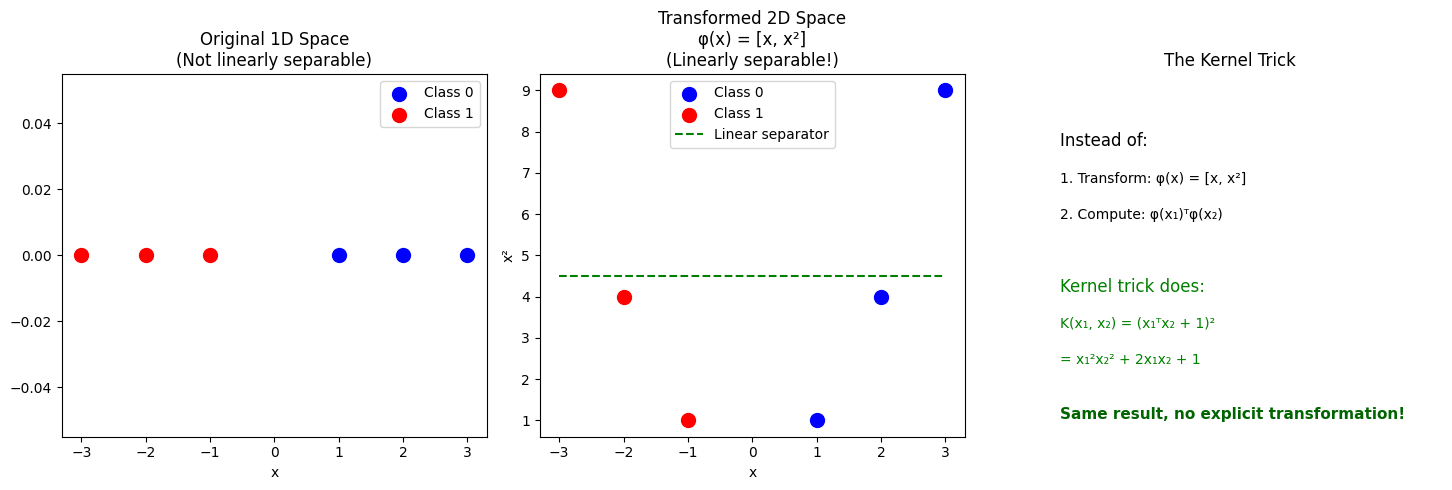

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_kernel_trick():
    """
    Visualize how kernel trick works with a simple example
    """
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Original 1D data (not linearly separable)
    X_1d = np.array([-3, -2, -1, 1, 2, 3]).reshape(-1, 1)
    y = np.array([1, 1, 1, 0, 0, 0])

    # Plot 1: Original space
    ax1 = axes[0]
    ax1.scatter(X_1d[y==0], np.zeros(3), c='blue', s=100, label='Class 0')
    ax1.scatter(X_1d[y==1], np.zeros(3), c='red', s=100, label='Class 1')
    ax1.set_title('Original 1D Space\n(Not linearly separable)')
    ax1.set_xlabel('x')
    ax1.legend()

    # Transform to 2D using φ(x) = [x, x²]
    X_2d = np.c_[X_1d, X_1d**2]

    # Plot 2: Transformed space
    ax2 = axes[1]
    ax2.scatter(X_2d[y==0, 0], X_2d[y==0, 1], c='blue', s=100, label='Class 0')
    ax2.scatter(X_2d[y==1, 0], X_2d[y==1, 1], c='red', s=100, label='Class 1')
    ax2.plot([-3, 3], [4.5, 4.5], 'g--', label='Linear separator')
    ax2.set_title('Transformed 2D Space\nφ(x) = [x, x²]\n(Linearly separable!)')
    ax2.set_xlabel('x')
    ax2.set_ylabel('x²')
    ax2.legend()

    # Plot 3: Kernel computation
    ax3 = axes[2]
    ax3.text(0.1, 0.8, 'Instead of:', fontsize=12, transform=ax3.transAxes)
    ax3.text(0.1, 0.7, '1. Transform: φ(x) = [x, x²]', fontsize=10, transform=ax3.transAxes)
    ax3.text(0.1, 0.6, '2. Compute: φ(x₁)ᵀφ(x₂)', fontsize=10, transform=ax3.transAxes)
    ax3.text(0.1, 0.4, 'Kernel trick does:', fontsize=12, transform=ax3.transAxes, color='green')
    ax3.text(0.1, 0.3, 'K(x₁, x₂) = (x₁ᵀx₂ + 1)²', fontsize=10, transform=ax3.transAxes, color='green')
    ax3.text(0.1, 0.2, '= x₁²x₂² + 2x₁x₂ + 1', fontsize=10, transform=ax3.transAxes, color='green')
    ax3.text(0.1, 0.05, 'Same result, no explicit transformation!', fontsize=11,
             transform=ax3.transAxes, color='darkgreen', weight='bold')
    ax3.set_title('The Kernel Trick')
    ax3.axis('off')

    plt.tight_layout()
    plt.show()

visualize_kernel_trick()

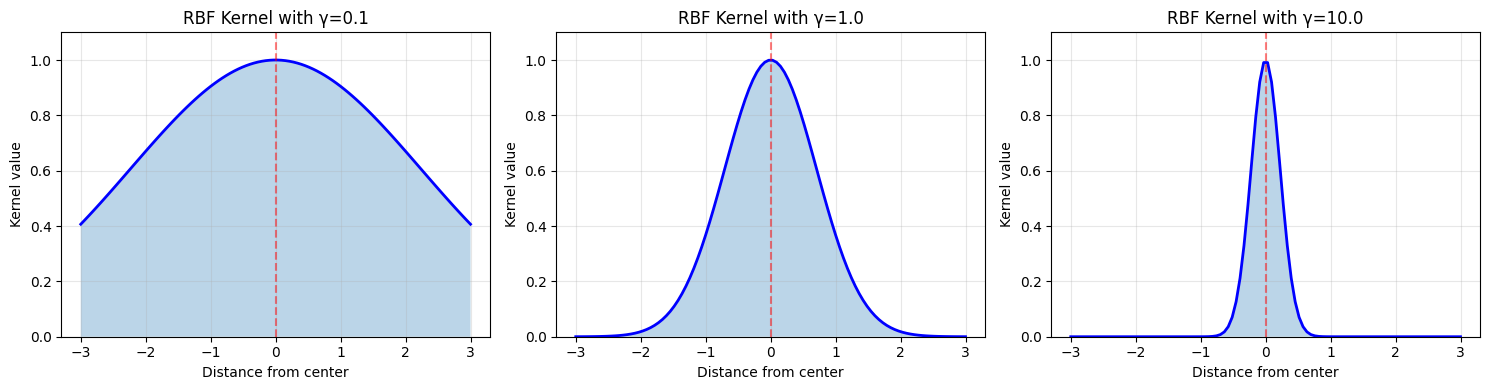

In [6]:
def visualize_gamma_effect():
    """
    Show how gamma affects RBF kernel behavior
    """
    x = np.linspace(-3, 3, 100)
    x0 = 0  # Center point

    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    gammas = [0.1, 1.0, 10.0]

    for ax, gamma in zip(axes, gammas):
        # RBF kernel centered at x0
        k = np.exp(-gamma * (x - x0)**2)
        ax.plot(x, k, 'b-', linewidth=2)
        ax.fill_between(x, 0, k, alpha=0.3)
        ax.set_title(f'RBF Kernel with γ={gamma}')
        ax.set_xlabel('Distance from center')
        ax.set_ylabel('Kernel value')
        ax.set_ylim([0, 1.1])
        ax.grid(True, alpha=0.3)
        ax.axvline(x0, color='r', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()
visualize_gamma_effect()

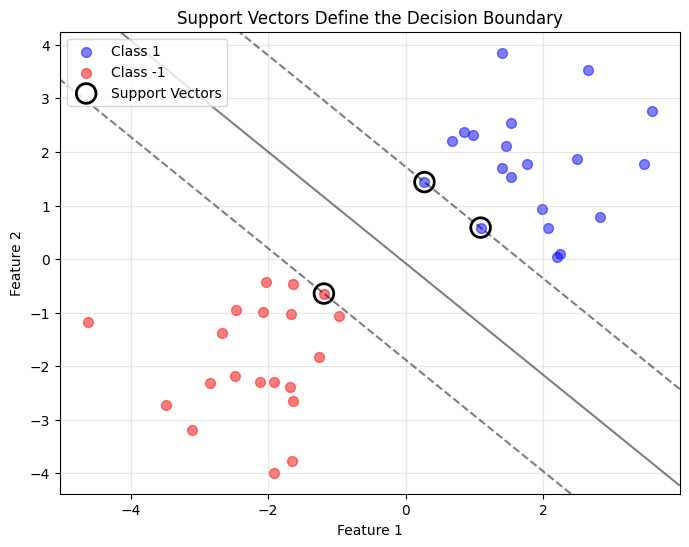

Total training points: 40
Support vectors: 3
Percentage: 7.5%


In [5]:
def explain_support_vectors():
    """
    Visualize concept of support vectors
    """
    # Generate sample data
    np.random.seed(42)
    X_class1 = np.random.randn(20, 2) + [2, 2]
    X_class2 = np.random.randn(20, 2) + [-2, -2]
    X = np.vstack([X_class1, X_class2])
    y = np.array([1]*20 + [-1]*20)

    from sklearn.svm import SVC

    # Train SVM
    clf = SVC(kernel='linear', C=1.0)
    clf.fit(X, y)

    # Get support vectors
    support_vectors = clf.support_vectors_

    plt.figure(figsize=(8, 6))

    # Plot all points
    plt.scatter(X_class1[:, 0], X_class1[:, 1], c='blue', s=50, alpha=0.5, label='Class 1')
    plt.scatter(X_class2[:, 0], X_class2[:, 1], c='red', s=50, alpha=0.5, label='Class -1')

    # Highlight support vectors
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                s=200, linewidth=2, facecolors='none', edgecolors='black',
                label='Support Vectors')

    # Plot decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Support Vectors Define the Decision Boundary')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    print(f"Total training points: {len(X)}")
    print(f"Support vectors: {len(support_vectors)}")
    print(f"Percentage: {100*len(support_vectors)/len(X):.1f}%")

explain_support_vectors()